# My 1st Kaggle Competition🎉🎉🎉

# Academic Success🎓🚀

### 💯 Objective:
#### * Classification with an Academic Success Dataset
#### * predict academic risk of students in higher education.
### 📃 Dataset: 
#### * The dataset used in this notebook is the 'Classification with an Academic Success Dataset' uploaded by Kaggle. This Data is Uploaded for Playground Series - Season 4, Episode 6 Kaggle Competetion

## Table of Content 
* [Step 1: Import Databases and Libraries](#step1)
* [Step 2: Data Exploration](#step2)
    * [2.1 Column Name Description](#step2.1)
    * [2.2 DataFrame Cleaning](#step2.2)
    * [2.3 Dataframe Statistics Summary](#step2.3)
* [Step 3: EDA](#step3)
    * [3.1 Visualization: Count plot](#step3.1)
    * [3.2 Visualization: Histogtam plot](#step3.2)
    * [3.3 Visualize Target Distribution](#step3.3)
    * [3.4 Checking for Outliers](#step3.4)
* [Step 4: Preprocessing](#step4)
    * [4.1 Feature Engineering](#4.1)
    * [4.2 Taget Encoding](#4.2)
    * [4.3 Visualize and Remove Highly Correlated Features](#4.3)
    * [4.4 Calculate Target Class weight](#4.4)
    * [4.5 Check and Remove low dependency features](#4.5)
    * [4.6 Feature Scaling](#4.6)
    * [4.7 Feature Reduction with PCA](#4.7)
    * [4.8 Dividing in train-test-split](#4.8)
* [Step 5: Baseline Model Training](#step5)
    * [5.1 Logistic Regression](#5.1)
    * [5.2 Naive Baynes](#5.2)
    * [5.3 KNN](#5.3)
    * [5.4 Gradient Boost](#5.4)
    * [5.5 XGBoost](#5.5)
    * [5.6 Decision Tree](#5.6)
    * [5.7 Random Forest](#5.7)
    * [5.8 Light GBM](#5.8)
    * [5.9 Model Comparison](#5.9)
* [Step 6: HyperTuning](#step6)
    * [6.1 XGBoost](#6.1)
    * [6.2 Light GB](#6.2)
* [Step 7: Submission Prep](#step7)

## Step 1: Import Databases and Libraries <a class="anchor"  id="step1"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display, HTML

# Machine Learning Algorithms
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    VotingClassifier,
    ExtraTreesClassifier
)
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import joblib

# Library for Cross-Validation
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict, RandomizedSearchCV

# Model Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,silhouette_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

#Print Input file names
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s4e6/sample_submission.csv
/kaggle/input/playground-series-s4e6/train.csv
/kaggle/input/playground-series-s4e6/test.csv


In [2]:
df_sample_sub = pd.read_csv('/kaggle/input/playground-series-s4e6/sample_submission.csv')
df_train = pd.read_csv('/kaggle/input/playground-series-s4e6/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s4e6/test.csv')

## Step 2: Data Exploration <a class="anchor"  id="step2"></a>

* The training Data has 76518 rows and 38 columns.
* The Testing Data has 51012 rows and 37 columns.
* while the Sample Submission has 51012 rows and 2 columns

print the first 5 rows of dataframe

In [3]:
df_train.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [4]:
df_test.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,76518,1,1,1,9500,1,1,141.0,1,3,...,0,0,8,0,0,0.000000,0,13.9,-0.3,0.79
1,76519,1,1,1,9238,1,1,128.0,1,1,...,0,0,6,6,6,13.500000,0,11.1,0.6,2.02
2,76520,1,1,1,9238,1,1,118.0,1,1,...,0,0,6,11,5,11.000000,0,15.5,2.8,-4.06
3,76521,1,44,1,9147,1,39,130.0,1,1,...,0,3,8,14,5,11.000000,0,8.9,1.4,3.51
4,76522,1,39,1,9670,1,1,110.0,1,1,...,0,0,6,9,4,10.666667,2,7.6,2.6,0.32


In [5]:
df_sample_sub.head()

,id,Target
0,76518,Graduate
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Graduate


### 2.1 Column Name	Description  <a class="anchor"  id="step2.1"></a>
* id: Unique identifier for each student.
* Marital status: Marital status of the student (e.g., single, married).
* Application mode: Mode of application (e.g., online, offline).
* Application order: Order in which the application was submitted.
* Course: The course in which the student is enrolled.
* Daytime/evening attendance: Whether the student attends classes during the day or evening.
* Previous qualification: The previous qualification level of the student (e.g., high school, diploma).
* Previous qualification (grade): Grade achieved in the previous qualification.
* Nacionality: Nationality of the student.
* Mother's qualification: Educational qualification of the student's mother.
* Father's qualification: Educational qualification of the student's father.
* Mother's occupation: Occupation of the student's mother.
* Father's occupation: Occupation of the student's father.
* Admission grade: Grade achieved at the time of admission.
* Displaced: Whether the student has been displaced from their original place of residence.
* Educational special needs: Whether the student has any special educational needs.
* Debtor: Whether the student has any outstanding debts.
* Tuition fees up to date: Whether the student's tuition fees are up to date.
* Gender: Gender of the student (e.g., male, female, non-binary).
* Scholarship holder: Whether the student is a scholarship holder.
* Age at enrollment: Age of the student at the time of enrollment.
* International: Whether the student is an international student.
* Curricular units 1st sem (credited): Number of curricular units credited in the first semester.
* Curricular units 1st sem (enrolled): Number of curricular units enrolled in the first semester.
* Curricular units 1st sem (evaluations): Number of evaluations in the first semester.
* Curricular units 1st sem (approved): Number of curricular units approved in the first semester.
* Curricular units 1st sem (grade): Grade of the curricular units in the first semester.
* Curricular units 1st sem (without evaluations): Number of curricular units without evaluations in the first semester.
* Curricular units 2nd sem (credited): Number of curricular units credited in the second semester.
* Curricular units 2nd sem (enrolled): Number of curricular units enrolled in the second semester.
* Curricular units 2nd sem (evaluations): Number of evaluations in the second semester.
* Curricular units 2nd sem (approved): Number of curricular units approved in the second semester.
* Curricular units 2nd sem (grade): Grade of the curricular units in the second semester.
* Curricular units 2nd sem (without evaluations): Number of curricular units without evaluations in the second semester.
* Unemployment rate: Unemployment rate at the time of enrollment.
* Inflation rate: Inflation rate at the time of enrollment.
* GDP: GDP at the time of enrollment.
* Target: The target variable indicating the success of the student (e.g., binary outcome such as success or failure).m

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

#### Based on info above, there are 37 numerical column and 1 string column

#### There is no null value in the dataframe

### 2.2 Dataframe Cleaning  <a class="anchor"  id="step2.2"></a>

#### Save ID in a separate variable since id value is not useful for the analysis

In [7]:
id_train = df_train['id']
id_test = df_test['id']
df_train.drop(columns = 'id',inplace = True)
df_test.drop(columns = 'id',inplace = True)

#### Checking number of Duplicated data

In [8]:
print("Duplicates in Dataset: ",df_train.duplicated().sum())

Duplicates in Dataset:  0


### 2.3 Dataframe Statistics Summary <a class="anchor"  id="step2.3"></a>

In [9]:
round(df_train.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Marital status,76518.0,1.11,0.44,1.00,1.00,1.00,1.00,6.00
Application mode,76518.0,16.05,16.68,1.00,1.00,17.00,39.00,53.00
Application order,76518.0,1.64,1.23,0.00,1.00,1.00,2.00,9.00
Course,76518.0,9001.29,1803.44,33.00,9119.00,9254.00,9670.00,9991.00
Daytime/evening attendance,76518.0,0.92,0.28,0.00,1.00,1.00,1.00,1.00
Previous qualification,76518.0,3.66,8.62,1.00,1.00,1.00,1.00,43.00
Previous qualification (grade),76518.0,132.38,11.00,95.00,125.00,133.10,140.00,190.00
Nacionality,76518.0,1.23,3.39,1.00,1.00,1.00,1.00,109.00
Mother's qualification,76518.0,19.84,15.40,1.00,1.00,19.00,37.00,44.00
Father's qualification,76518.0,23.43,14.92,1.00,4.00,19.00,37.00,44.00


#### Unique values
##### only print the once with unique value < 100 for cleaness

In [10]:
unique_table = {}
con_col = {}
column_list = df_train.columns.values.tolist()
for column_name in column_list:
    #print features with unique values < 20 for easier visualization
    if len(df_train[column_name].unique()) < 20:
        unique_table[column_name] = str(df_train[column_name].unique())
    else:
        #of unique value No > 20 then unique values are less important
        con_col[column_name] = str(df_train[column_name].unique())

unique_table

{'Marital status': '[1 2 4 3 5 6]',
 'Application order': '[1 2 3 6 4 5 0 9]',
 'Course': '[9238 9254 9500  171 9085 9773 9003 9853 9147 9670 8014 9119 9991 9130\n 9556 9070   33  979   39]',
 'Daytime/evening attendance': '[1 0]',
 'Nacionality': '[  1  26  41  24   6 100  21  22  11 101   2 103 105  25  17  62 109  32]',
 'Displaced': '[0 1]',
 'Educational special needs': '[0 1]',
 'Debtor': '[0 1]',
 'Tuition fees up to date': '[1 0]',
 'Gender': '[0 1]',
 'Scholarship holder': '[1 0]',
 'International': '[0 1]',
 'Curricular units 1st sem (without evaluations)': '[ 0  2  1  4  5  3  6  7 12  8 10  9]',
 'Curricular units 2nd sem (without evaluations)': '[ 0  1  4  2  3  8  5  7  6 12 10]',
 'Unemployment rate': '[11.1 16.2  7.6 13.9 12.4 10.8  9.4 12.7 15.5  8.9 14.5]',
 'Inflation rate': '[ 0.6  0.3  2.6 -0.3  0.5  1.4 -0.8  3.7  2.8  0.7 -0.6  0.4  2.5]',
 'GDP': '[ 2.02 -0.92  0.32  0.79  1.79  1.74 -3.12 -1.7  -4.06  3.51  0.74]',
 'Target': "['Graduate' 'Dropout' 'Enrolled']"

## Step 3: EDA <a class="anchor"  id="step3"></a>

#### Have a Detailed look into some features

In [11]:
def analyze_student_data(df):
    # Number of Scholarship holders by Gender
    scholarship_by_gender = df_train.groupby('Gender')['Scholarship holder'].sum()
    print("Number of Scholarship holders by Gender:")
    print(scholarship_by_gender)
    print()

    # Total number of students with Educational special needs
    students_with_special_needs = df['Educational special needs'].sum()
    print(f"Total number of students with Educational special needs: {students_with_special_needs}")
    print()

    # Proportion of International students
    international_proportion = df['International'].mean() * 100
    print(f"Proportion of International students: {international_proportion:.2f}%")
    print()
    
    # Average Tuition fees up to date by Course
    avg_tuition_by_course = df_train.groupby('Course')['Tuition fees up to date'].describe()
    print("Average Tuition fees up to date by Course:")
    print(avg_tuition_by_course)
    print()

    # Percentage of students who are Displaced
    displaced_percentage = (df['Displaced'].sum() / len(df)) * 100
    print(f"Percentage of students who are Displaced: {displaced_percentage:.2f}%")
    print()

    # Average GDP across all observations
    avg_gdp = df['GDP'].mean()
    print(f"Average GDP across all observations: {avg_gdp}")
    print()
    
    

    # Maximum Curricular units 1st sem (grade) achieved
    max_grade_1st_sem = df['Curricular units 1st sem (grade)'].max()
    print(f"Maximum Curricular units 1st sem (grade) achieved: {max_grade_1st_sem}")
    print()
    
        # Maximum Curricular units 2nd sem (grade) achieved
    max_grade_2nd_sem = df['Curricular units 2nd sem (grade)'].max()
    print(f"Maximum Curricular units 2nd sem (grade) achieved: {max_grade_2nd_sem}")
    print()
    
    # Value counts of Target 
    vc_target= df['Target'].value_counts()
    print(f"Value Counts of Target: {vc_target}")
    print()

# Call the function with your DataFrame
analyze_student_data(df_train)

Number of Scholarship holders by Gender:
Gender
0    16448
1     2482
Name: Scholarship holder, dtype: int64

Total number of students with Educational special needs: 286

Proportion of International students: 0.66%

Average Tuition fees up to date by Course:
          count      mean       std  min  25%  50%  75%  max
Course                                                      
33         72.0  0.819444  0.387349  0.0  1.0  1.0  1.0  1.0
39          1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0
171      2859.0  0.880378  0.324576  0.0  1.0  1.0  1.0  1.0
979         1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0
8014     2438.0  0.842494  0.364352  0.0  1.0  1.0  1.0  1.0
9003     3733.0  0.762122  0.425841  0.0  1.0  1.0  1.0  1.0
9070     3281.0  0.930204  0.254841  0.0  1.0  1.0  1.0  1.0
9085     5373.0  0.897264  0.303642  0.0  1.0  1.0  1.0  1.0
9119     3004.0  0.804927  0.396323  0.0  1.0  1.0  1.0  1.0
9130     1606.0  0.807597  0.394311  0.0  1.0  1.0  1.0  1.0
9147    

### 3.1 Visualization: Count plot <a class="anchor"  id="step3.1"></a>

#### For the features as count plot (Note: x axis is ordered by number of counts, and some values here are rounded)

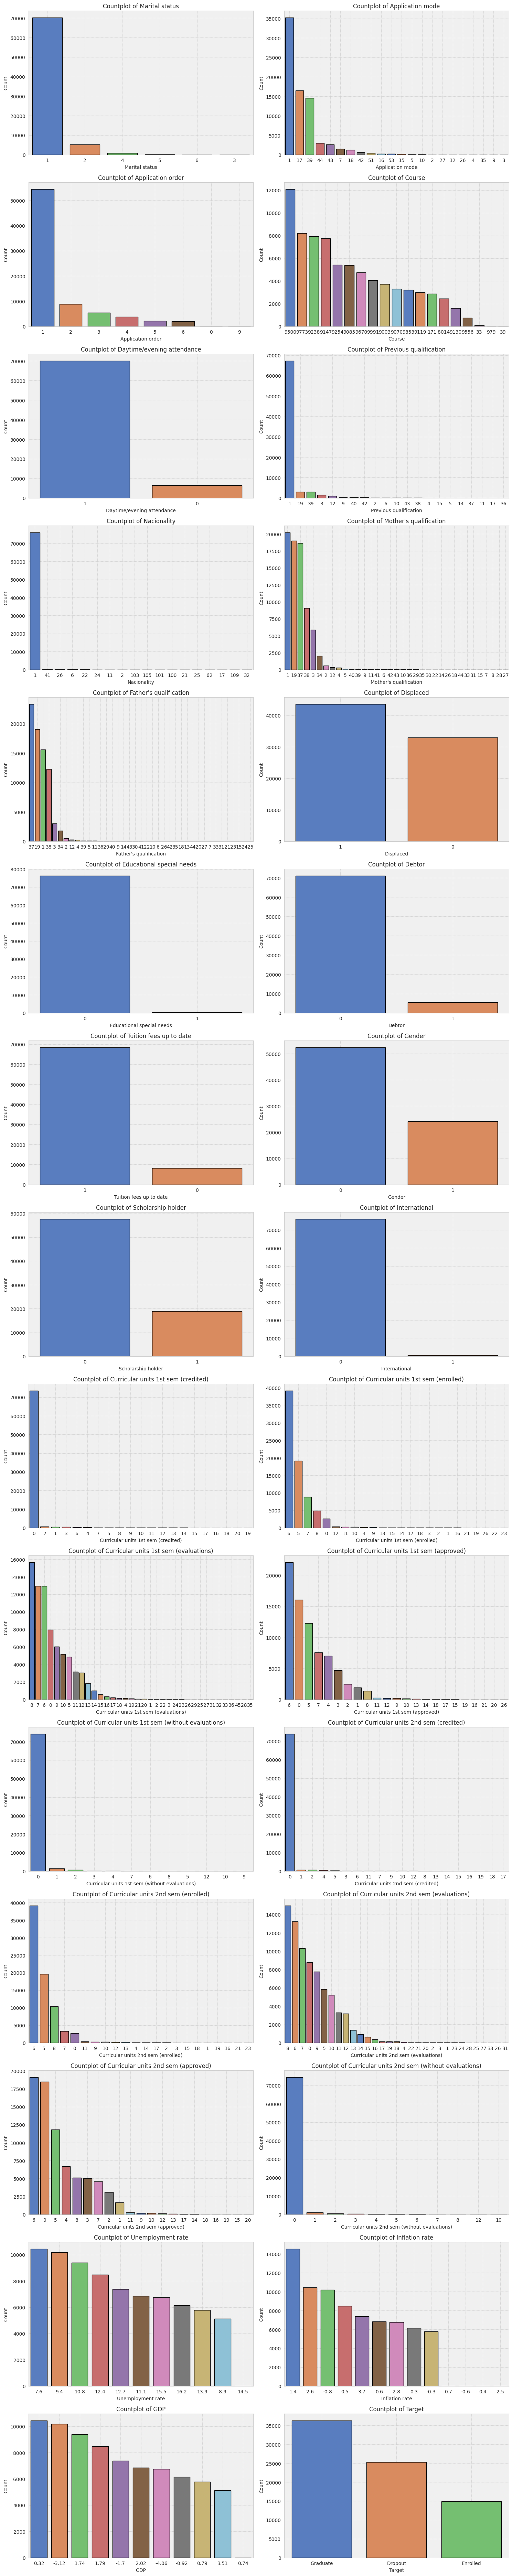

In [12]:
def plot_categorical_countplots(df_train):
    # Select categorical columns
    categorical_columns = [
        'Marital status', 'Application mode', 'Application order',
        'Course', 'Daytime/evening attendance', 'Previous qualification','Nacionality',
        "Mother's qualification", "Father's qualification",
        'Displaced', 'Educational special needs', 'Debtor',
        'Tuition fees up to date', 'Gender', 'Scholarship holder','International',
        'Curricular units 1st sem (credited)',
        'Curricular units 1st sem (enrolled)',
        'Curricular units 1st sem (evaluations)',
        'Curricular units 1st sem (approved)',
        'Curricular units 1st sem (without evaluations)',
        'Curricular units 2nd sem (credited)',
        'Curricular units 2nd sem (enrolled)',
        'Curricular units 2nd sem (evaluations)',
        'Curricular units 2nd sem (approved)',
        'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
        'Inflation rate', 'GDP', 'Target'
    ]
    background_color = '#f0f0f0'
    sns.set_style("whitegrid", {"axes.facecolor": background_color})
    
    num_plots = len(categorical_columns)
    num_rows = (num_plots + 1) // 2  # Adjust number of rows for subplot layout
    num_cols = 2  # Set number of columns for subplot layout
    
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    #convert a N-D arrary to a 1-D array
    axs = axs.flatten()
    
    for i, col in enumerate(categorical_columns):
        p = sns.countplot(x=col, data=df_train, palette='muted', edgecolor='black', linewidth=1, ax=axs[i], order=df_train[col].value_counts().index)
        p.set_title(f"Countplot of {col}")
        p.set_xlabel(col)
        p.set_ylabel("Count")
        p.grid(True, linestyle='--', linewidth=0.5)
    
    # Hide any unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
    
    plt.tight_layout()
    plt.show()

# Usage example:
plot_categorical_countplots(df_train)

### 3.2 Visualization: Histogtam plot <a class="anchor"  id="step3.2"></a>

#### For some features with a lot variation of values, plot as histogram to check distribution and skewness of data
##### KDE kernel density estimate is plotted: to smooth the distribution and show on the plot as (one or more) line(s). Only relevant with univariate data.

/tmp/ipykernel_18/3390331143.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  p = sns.histplot(df_train[col], bins=20, kde=True, ax=axs[i], palette='magma', edgecolor='black', linewidth=1)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_18/3390331143.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  p = sns.histplot(df_train[col], bins=20, kde=True, ax=axs[i], palette='magma', edgecolor='black', linewidth=1)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_18/3390

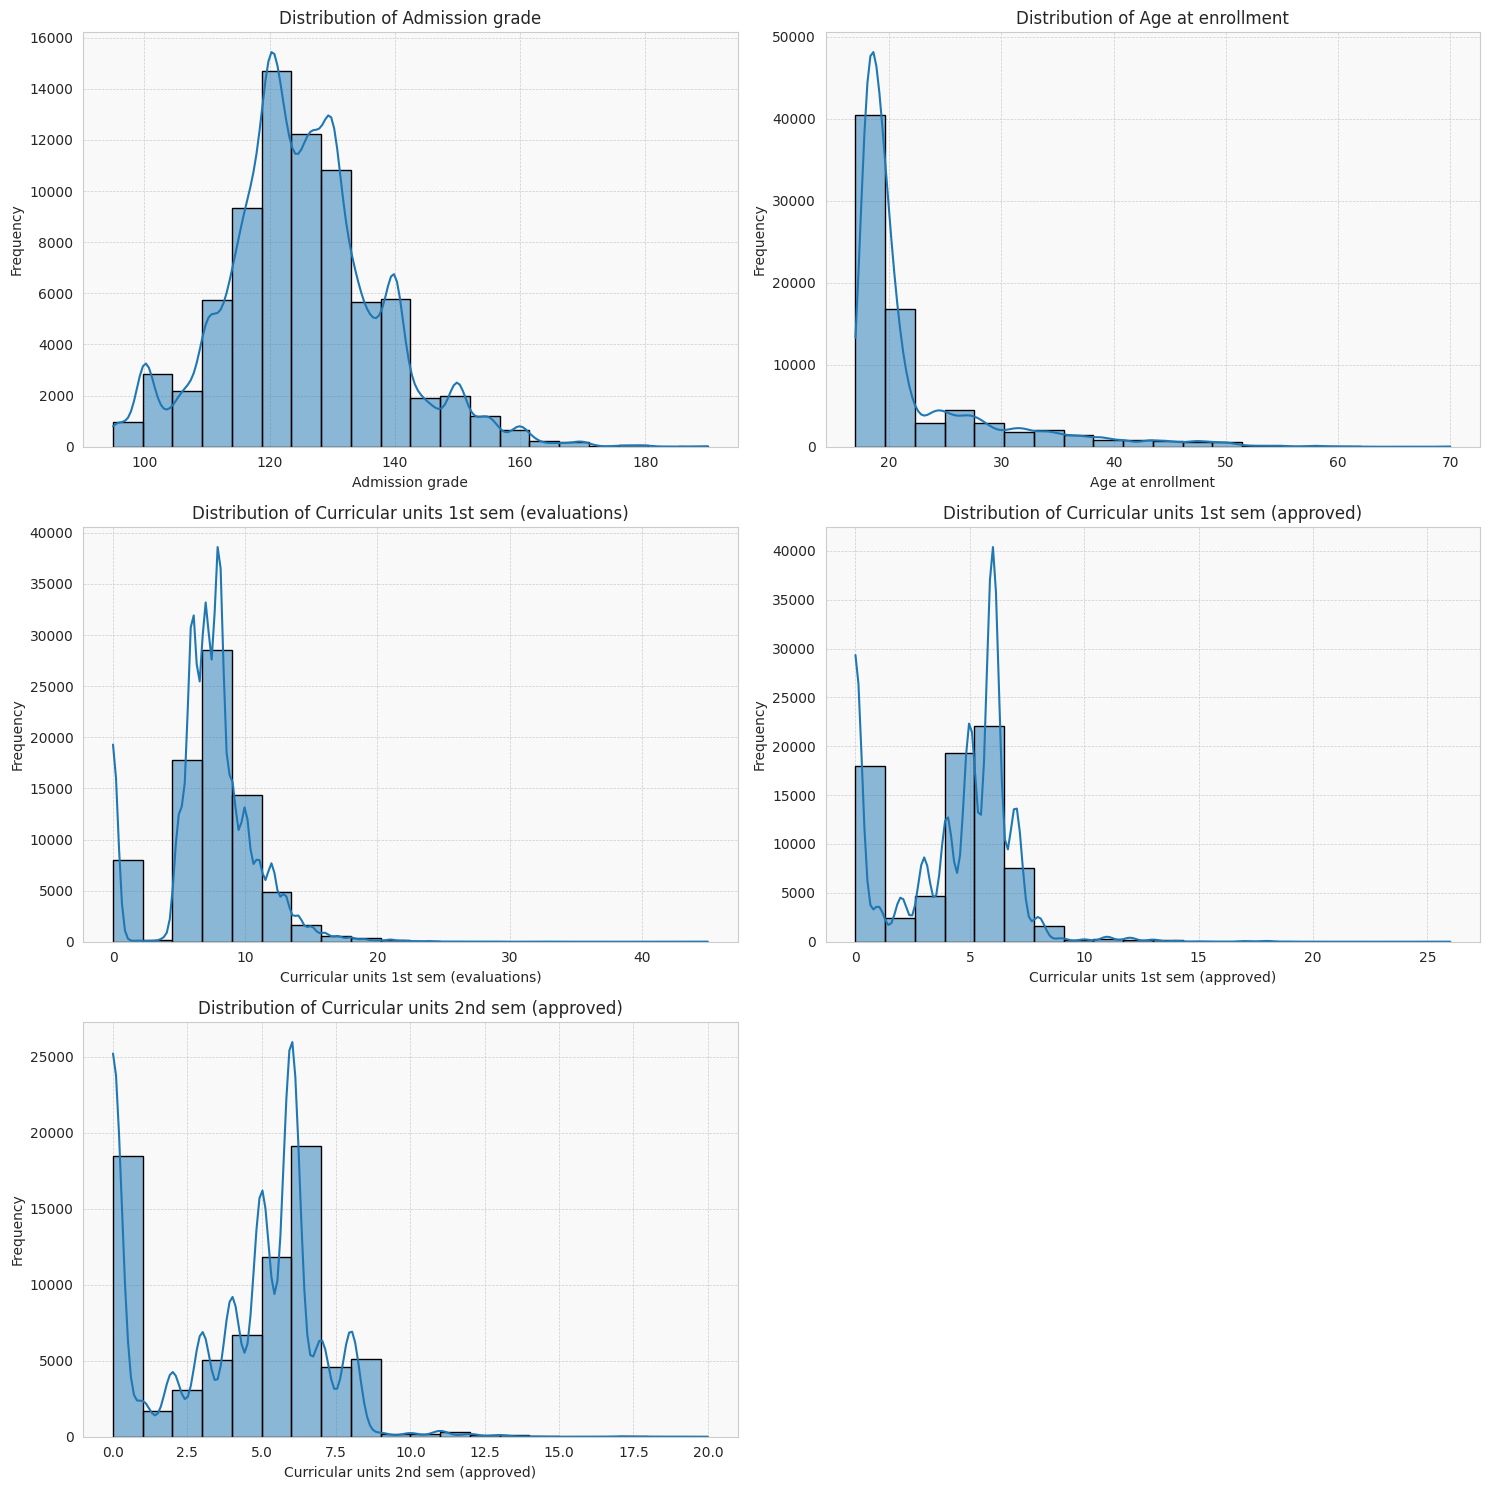

In [13]:
def plot_numeric_distribution(df_train):
    # Define all numeric columns to plot
    numeric_columns = [
        'Admission grade', 'Age at enrollment',
        'Curricular units 1st sem (evaluations)',
        'Curricular units 1st sem (approved)',
        'Curricular units 2nd sem (approved)',
    ]
    
    # Adjust layout parameters
    background_color = '#f9f9f9'
    sns.set_style("whitegrid", {"axes.facecolor": background_color})
    
    num_plots = len(numeric_columns)
    num_rows = (num_plots + 1) // 2  # Adjust number of rows for subplot layout
    num_cols = 2  # Set number of columns for subplot layout
    
    # Create subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    axs = axs.flatten()
    
    # Plot each numeric column
    for i, col in enumerate(numeric_columns):
        # Histogram with KDE plot
        # bin: separate data into how many bars
        p = sns.histplot(df_train[col], bins=20, kde=True, ax=axs[i], palette='magma', edgecolor='black', linewidth=1)
        p.set_title(f"Distribution of {col}")
        p.set_xlabel(col)
        p.set_ylabel("Frequency")
        p.grid(True, linestyle='--', linewidth=0.5)
    
    # Hide any unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
    
    plt.tight_layout()
    plt.show()

# Usage example:
plot_numeric_distribution(df_train)

### 3.3 Visualize Target Distribution <a class="anchor"  id="step3.3"></a>


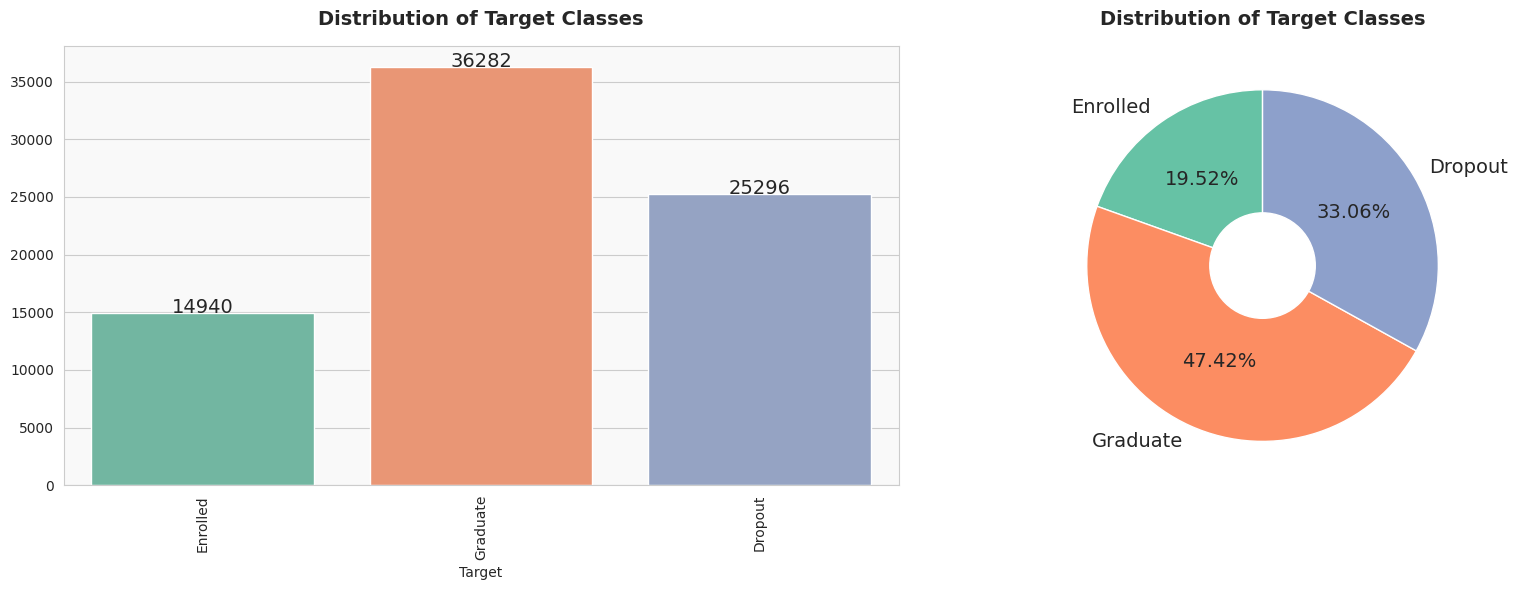

In [14]:
# Unique values of Target for multiclass
classes = ['Enrolled', 'Graduate', 'Dropout']

# Visualization to show distribution of Target classes in counts
plt.figure(figsize=(17, 6))

# Subplot 1: Bar plot of target class counts
plt.subplot(1, 2, 1)
#reindex index to actual class name
Target_counts = df_train["Target"].value_counts().reindex(classes)
sns.barplot(x=Target_counts.index, y=Target_counts.values, palette='Set2')
plt.title("Distribution of Target Classes", fontweight="black", size=14, pad=15)
for i, v in enumerate(Target_counts.values):
    plt.text(i, v, v, ha="center", fontsize=14)
plt.xticks(rotation=90)

# Subplot 2: Pie chart of target class distribution
plt.subplot(1, 2, 2)
colors = sns.color_palette('Set2', len(classes))
#autopct: automatically calculate percentage 
plt.pie(Target_counts, labels=classes, autopct="%.2f%%", textprops={"size": 14},
        colors=colors, startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
#gcf stands for "get current figure." 
fig = plt.gcf()
#gca stands for "get current axes."  add_artist(center_circle) adds the previously created white circle to the plot area
fig.gca().add_artist(center_circle)
plt.title("Distribution of Target Classes", fontweight="black", size=14, pad=15)

plt.tight_layout()
plt.show()

### 3.4 Checking for outliers <a class="anchor"  id="step3.4"></a>
* This code defines a function detect_outliers that identifies and visualizes outliers in each numeric column of the Training Dataset using box plots.
* It is particularly useful for exploratory data analysis (EDA) to quickly identify and visualize outliers in a dataset, which can help in understanding the data distribution and making decisions about data cleaning or preprocessing.
* It returns a dictionary containing the percentage of outliers for each column.

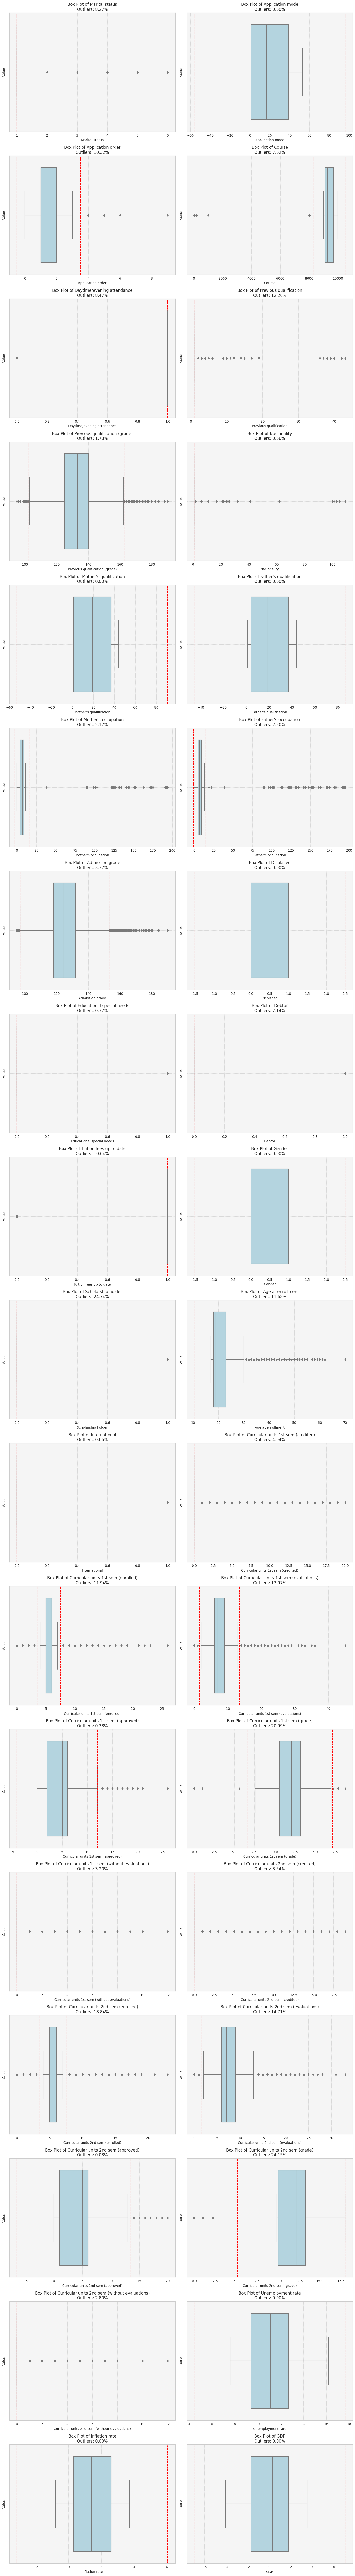

In [15]:
def detect_outliers(df_train):
    background_color = '#f5f5f5'
    sns.set_style("whitegrid", {"axes.facecolor": background_color})
    
    #Select the numerical columns
    numeric_columns = df_train.select_dtypes(include='number').columns
    num_plots = len(numeric_columns)
    num_rows = (num_plots + 1) // 2  # Adjust number of rows for subplot layout
    num_cols = 2  # Set number of columns for subplot layout
    
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 6 * num_rows))
    axs = axs.flatten()
    
    outlier_info = {}
    
    for i, col in enumerate(numeric_columns):
        ax = axs[i]
        
        # Calculate IQR for outlier detection
        Q1 = df_train[col].quantile(0.25)
        Q3 = df_train[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df_train[(df_train[col] < lower_bound) | (df_train[col] > upper_bound)]
        outlier_percentage = len(outliers) / len(df_train) * 100
        outlier_info[col] = outlier_percentage
                # Box Plot
        sns.boxplot(x=df_train[col], ax=ax, color='lightblue')
        #plot vertical lines for boundary
        ax.axvline(lower_bound, color='red', linestyle='--')
        ax.axvline(upper_bound, color='red', linestyle='--')
        ax.set_title(f"Box Plot of {col}\nOutliers: {outlier_percentage:.2f}%")
        ax.set_xlabel(col)
        ax.set_ylabel("Value")
        ax.grid(True, linestyle='--', linewidth=0.5)
    
    # Hide any unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])
    
    plt.tight_layout()
    plt.show()
    
    return outlier_info

# Example usage:
outlier_info = detect_outliers(df_train)
# for col, percentage in outlier_info.items():
#     print(f"Outlier percentage in {col}: {percentage:.2f}%")

## Step 4: Preprocessing <a class="anchor"  id="step4"></a>

### **4.1 Feature Engineering** <a class="anchor"  id="4.1"></a>**
#### **Create the following new features for better information representation**
* Number of courses failed
* mean, second quartile, third quartile: calculated across all columns in **one row**
* Inflation_GDP_ratio: inflation rate/GDP
* Unemployment rate/GDP
* GDP * inflation rate

In [16]:
#Take out all columns except for taget
numerical_columns = df_test.columns

In [17]:
def generate_features(df):
    # Create new features
    df['units failed 1'] = df['Curricular units 1st sem (enrolled)'] - df['Curricular units 1st sem (approved)']
    df['mean'] = df[numerical_columns].mean(axis=1).round(2)
    
    quartiles = df[numerical_columns].quantile([0.25, 0.5, 0.75], axis=1)
    df['second_quartile'] = quartiles.loc[0.5]
    df['third_quartile'] = quartiles.loc[0.75]
    
    #original_cols = list(X.columns)
    df['Inflation_GDP_ratio'] = df['Inflation rate'] / df['GDP']
    df['Unemployment_GDP_ratio'] = df['Unemployment rate'] / df['GDP']
    df['GDP_inflation_interaction'] = df['GDP'] * df['Inflation rate']
    return df

In [18]:
generate_features(df_train)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Inflation rate,GDP,Target,units failed 1,mean,second_quartile,third_quartile,Inflation_GDP_ratio,Unemployment_GDP_ratio,GDP_inflation_interaction
0,1,1,1,9238,1,1,126.0,1,1,19,...,0.6,2.02,Graduate,0,267.23,1.00,6.250000,0.297030,5.495050,1.212
1,1,17,1,9238,1,1,125.0,1,19,19,...,0.6,2.02,Dropout,2,267.75,1.00,9.525000,0.297030,5.495050,1.212
2,1,17,2,9254,1,1,137.0,1,3,19,...,0.3,-0.92,Dropout,6,267.59,1.00,3.750000,-0.326087,-17.608696,-0.276
3,1,1,3,9500,1,1,131.0,1,19,3,...,0.6,2.02,Enrolled,0,275.03,2.01,9.500000,0.297030,5.495050,1.212
4,1,1,2,9500,1,1,132.0,1,19,37,...,2.6,0.32,Graduate,1,275.96,2.30,12.000000,8.125000,23.750000,0.832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,1,17,1,9254,1,1,121.0,1,19,1,...,-0.3,0.79,Graduate,0,267.84,1.00,9.400000,-0.379747,17.594937,-0.237
76514,1,1,6,9254,1,1,125.0,1,1,38,...,-0.8,-3.12,Graduate,2,268.89,1.00,9.100000,0.256410,-3.012821,2.496
76515,5,17,1,9085,1,1,138.0,1,37,37,...,-0.8,-3.12,Enrolled,1,265.52,4.50,11.675000,0.256410,-3.012821,2.496
76516,1,1,3,9070,1,1,136.0,1,38,37,...,2.6,0.32,Dropout,6,263.06,1.00,6.000000,8.125000,23.750000,0.832


In [19]:
generate_features(df_test)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Unemployment rate,Inflation rate,GDP,units failed 1,mean,second_quartile,third_quartile,Inflation_GDP_ratio,Unemployment_GDP_ratio,GDP_inflation_interaction
0,1,1,1,9500,1,1,141.0,1,3,1,...,13.9,-0.3,0.79,7,273.76,0.395,2.250,-0.379747,17.594937,-0.237
1,1,1,1,9238,1,1,128.0,1,1,19,...,11.1,0.6,2.02,0,267.13,1.000,6.250,0.297030,5.495050,1.212
2,1,1,1,9238,1,1,118.0,1,1,19,...,15.5,2.8,-4.06,0,266.98,1.000,11.000,-0.689655,-3.817734,-11.368
3,1,44,1,9147,1,39,130.0,1,1,19,...,8.9,1.4,3.51,1,267.76,3.000,12.125,0.398860,2.535613,4.914
4,1,39,1,9670,1,1,110.0,1,1,37,...,7.6,2.6,0.32,3,279.92,2.300,9.000,8.125000,23.750000,0.832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,1,1,2,171,1,1,128.0,1,38,37,...,15.5,2.8,-4.06,0,15.50,0.500,3.850,-0.689655,-3.817734,-11.368
51008,2,39,1,9119,1,19,133.1,1,19,37,...,9.4,-0.8,-3.12,5,266.40,1.000,9.100,0.256410,-3.012821,2.496
51009,1,1,1,171,1,1,127.0,1,1,1,...,15.5,2.8,-4.06,0,13.21,0.000,1.000,-0.689655,-3.817734,-11.368
51010,1,1,3,9773,1,1,132.0,1,19,19,...,7.6,2.6,0.32,1,282.79,2.800,8.250,8.125000,23.750000,0.832


### **4.2  Taget Encoding <a class="anchor"  id="4.2"></a>**
#### LabelEncode: Encode target labels with value between 0 and n_classes-1.

In [20]:
label_encoder = LabelEncoder()

In [21]:
df_train['Target'] = label_encoder.fit_transform(df_train['Target'])

zip(): produces an iterator of tuples e.g.  zip(['apple', 'banana', 'cherry'], [0, 1, 2]): ('apple', 0), ('banana', 1), ('cherry', 2).

In [22]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:")
print(label_mapping)

Label Mapping:
{'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}


### **4.3 Check highly Correlated Features with Heatmap and Remove<a class="anchor"  id="4.3"></a>**

<Axes: title={'center': 'Correlation Plot'}>

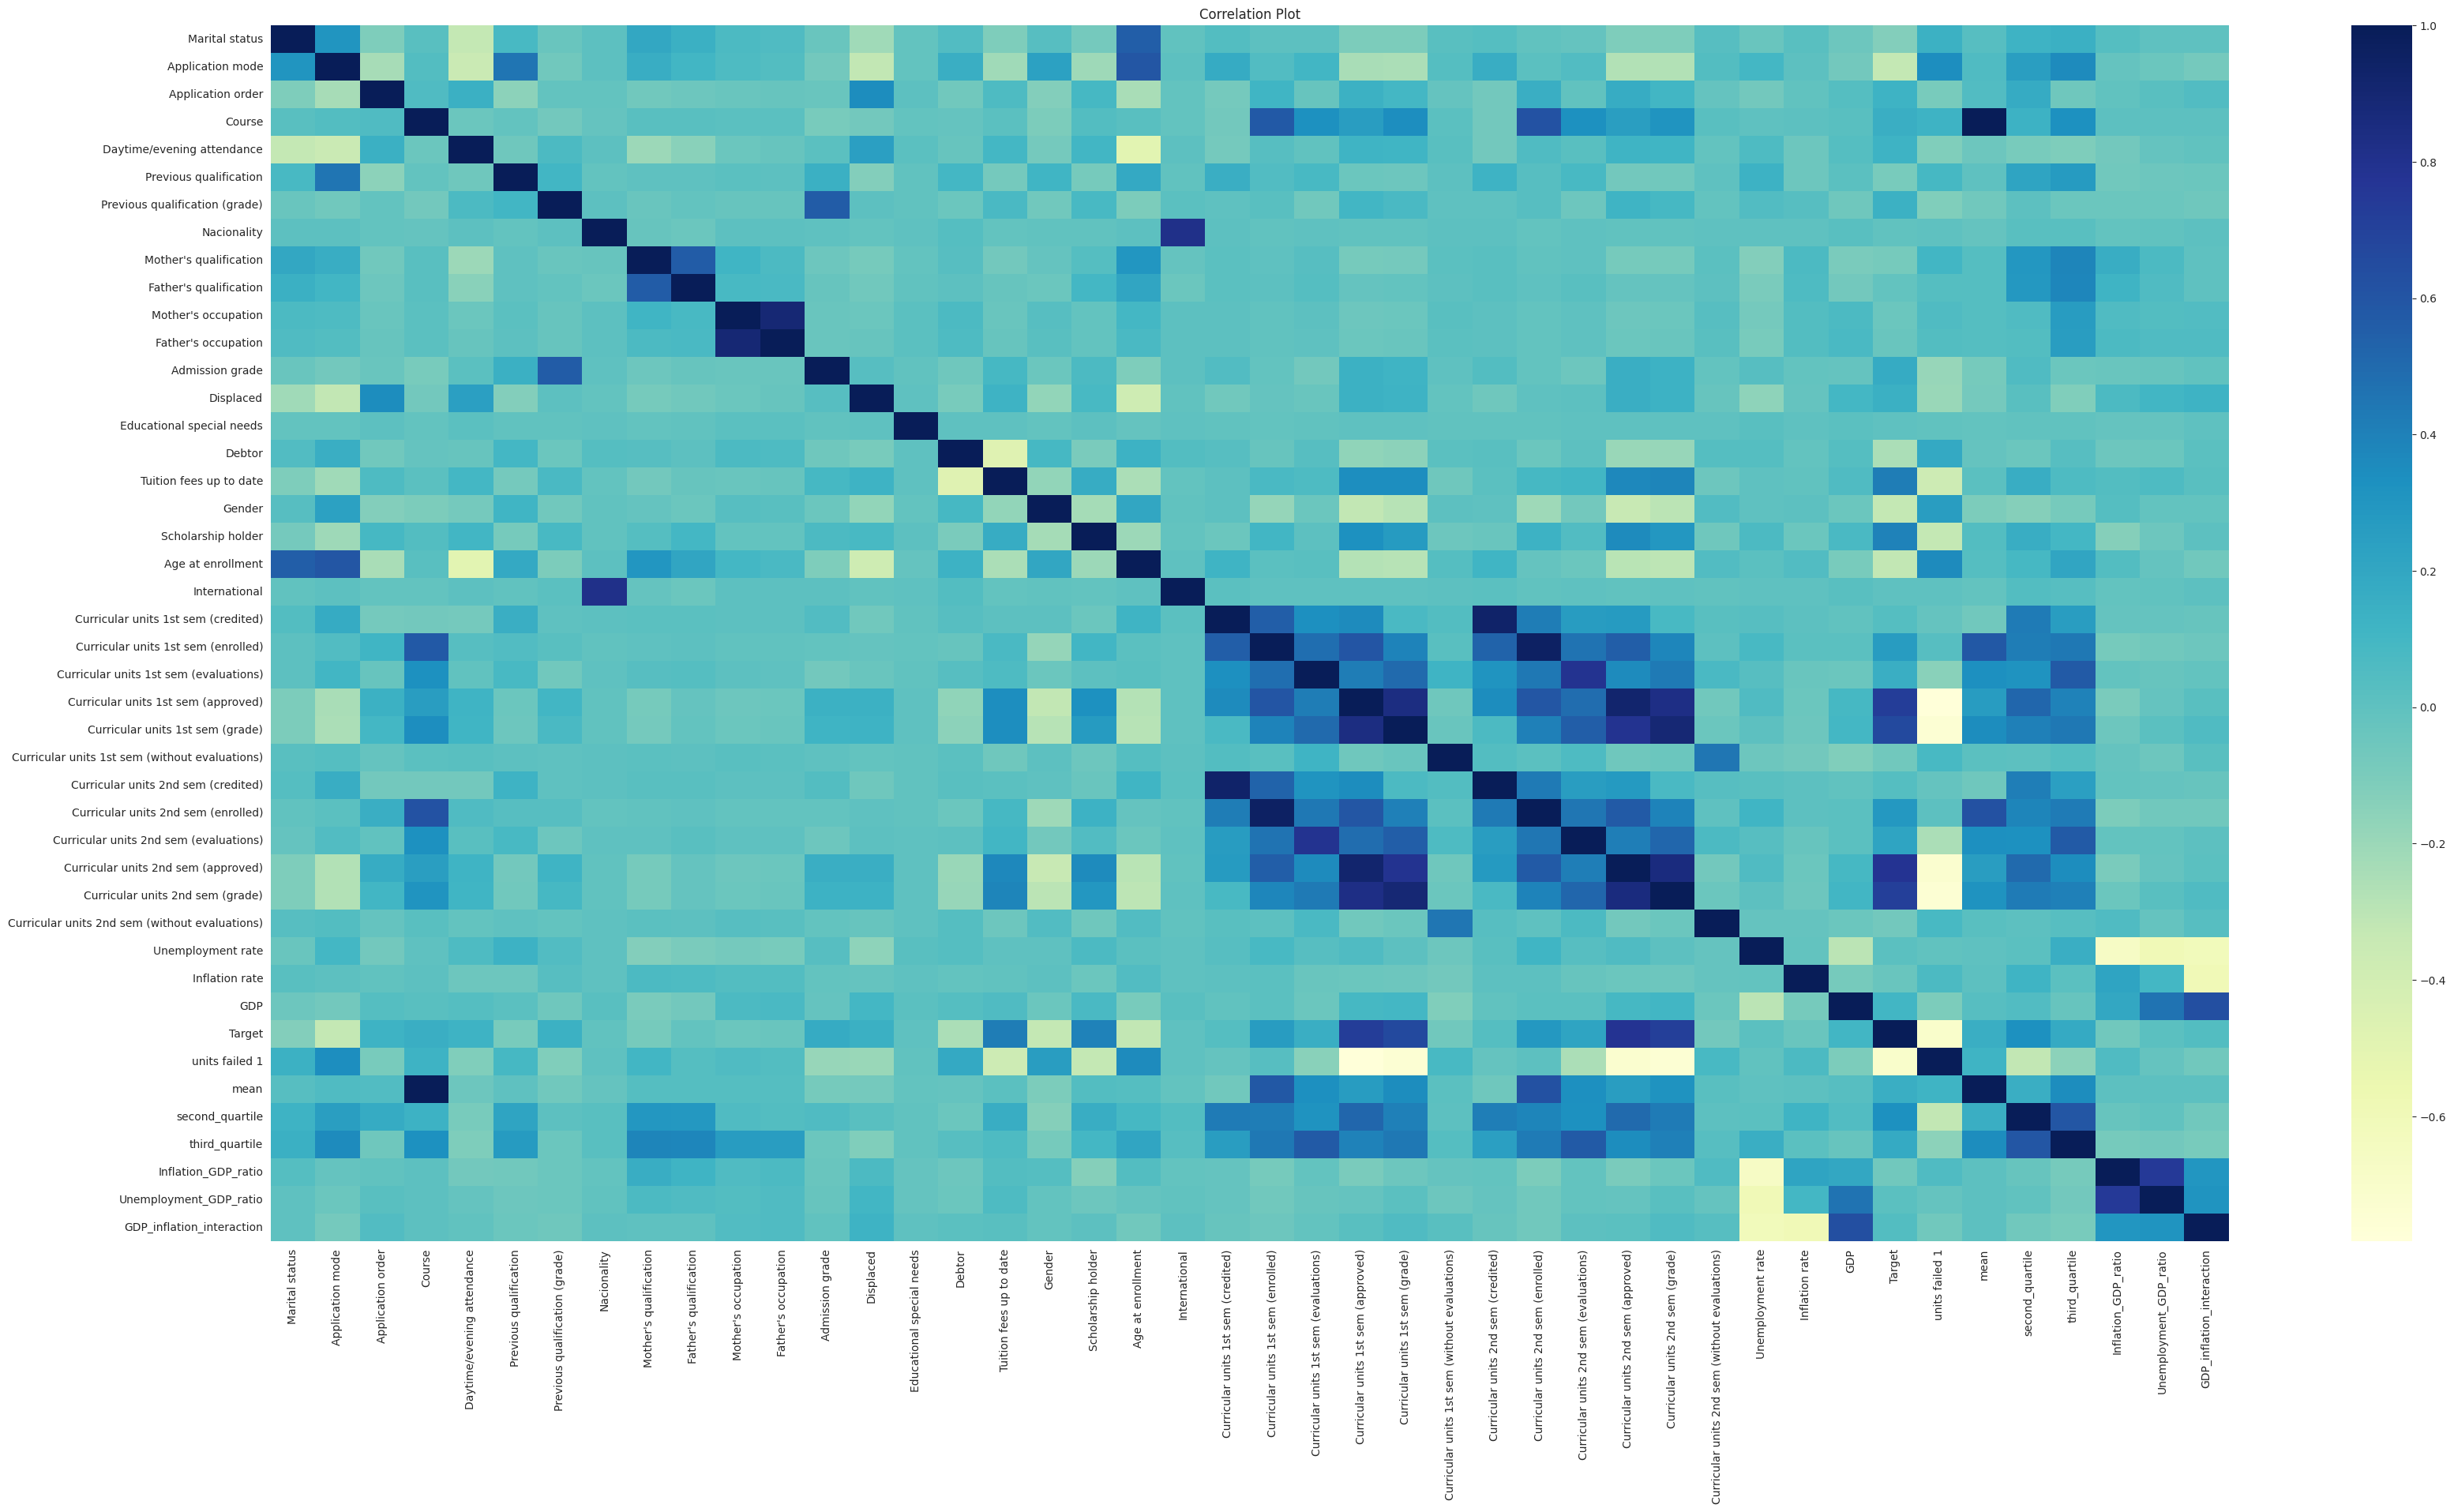

In [23]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(df_train.corr(),cmap='YlGnBu')

In [24]:
# Calculate the correlation matrix
correlation_matrix = df_train.corr()

# Create a mask to identify the features with a correlation coefficient greater than or equal to 0.75
high_correlation_mask = correlation_matrix >= 0.75

# Identify and list the highly correlated features
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    #make sure there is no repetitive tuple in the list
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            #use tuple
            highly_correlated_features.append((feature, correlated_feature))

# Print the highly correlated features
print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")

Highly correlated features:
Course and mean
Nacionality and International
Mother's occupation and Father's occupation
Curricular units 1st sem (credited) and Curricular units 2nd sem (credited)
Curricular units 1st sem (enrolled) and Curricular units 2nd sem (enrolled)
Curricular units 1st sem (evaluations) and Curricular units 2nd sem (evaluations)
Curricular units 1st sem (approved) and Curricular units 1st sem (grade)
Curricular units 1st sem (approved) and Curricular units 2nd sem (approved)
Curricular units 1st sem (approved) and Curricular units 2nd sem (grade)
Curricular units 1st sem (grade) and Curricular units 2nd sem (approved)
Curricular units 1st sem (grade) and Curricular units 2nd sem (grade)
Curricular units 2nd sem (approved) and Curricular units 2nd sem (grade)
Curricular units 2nd sem (approved) and Target


#### Droping columns which are highly correlated for feature reduction
Nationality and international has direct relationship so drop that

In [25]:
cols = ['Nacionality']
df_train.drop(columns=cols, inplace=True)
df_test.drop(columns=cols, inplace=True)

### 4.4 Calculate Target Class weight<a class="anchor"  id="4.4"></a>

In [26]:
#Note: Inplace = False by default here, which means a modified copy is created instead of df_train itself getting modified
x = df_train.drop(['Target'], axis=1)
y = df_train['Target']

#### compute_class_weight('balanced'):  If “balanced”, class weights will be given by n_samples / (n_classes * num_of_occurence_for_1_class)

In [27]:
from sklearn.utils.class_weight import compute_class_weight
# Convert y to a NumPy array if it's not already one
arr = np.array(y)

# Calculate unique classes in y
unique_classes = np.unique(arr)

# Convert unique_classes to a list to ensure hashability
unique_classes_list = list(unique_classes)

# Calculate class weights based on the training data
class_weights = compute_class_weight('balanced', 
                                     classes=unique_classes_list,
                                     y=y)

# Create a dictionary of class weights
class_weights_dict = dict(zip(unique_classes_list, class_weights))
print(class_weights_dict)

{0: 1.0083017077798861, 1: 1.7072289156626506, 2: 0.7029932197784026}


### **4.5 Check Feature Importance and remove low dependency features <a class="anchor"  id="4.5"></a>**

#### Calculate dependency between Target and Features
#### mutual_info_regression: Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

In [28]:
#Check features with discrete value
discrete_features = x.dtypes == int

def mi_score_maker(x,y,discrete_features):
    scores = mutual_info_regression(x,y,discrete_features=discrete_features)
    df = pd.DataFrame({
        'Features':x.columns,
        'Scores':scores
    })
    df = df.sort_values(['Scores'],ascending=False).reset_index(drop=True)
    return df

In [29]:
mi_scores = mi_score_maker(x,y.astype('float64'),discrete_features)

mi_scores

,Features,Scores
0,Curricular units 2nd sem (approved),0.482093
1,Curricular units 2nd sem (grade),0.410157
2,Curricular units 1st sem (approved),0.406821
3,Curricular units 1st sem (grade),0.360079
4,units failed 1,0.342910
5,Curricular units 2nd sem (evaluations),0.197084
6,Curricular units 1st sem (evaluations),0.188095
7,third_quartile,0.155449
8,second_quartile,0.128685
9,Course,0.114663


#### List the Features with low dependency

In [30]:
# Filter features with scores less than 0.001285
low_score_features = mi_scores[mi_scores['Scores'] < 0.01]

# Extract the feature names
low_score_feature_names = low_score_features['Features'].tolist()

# Print the list of low score feature names
low_score_feature_names

['Curricular units 2nd sem (credited)',
 'Educational special needs',
 'International']

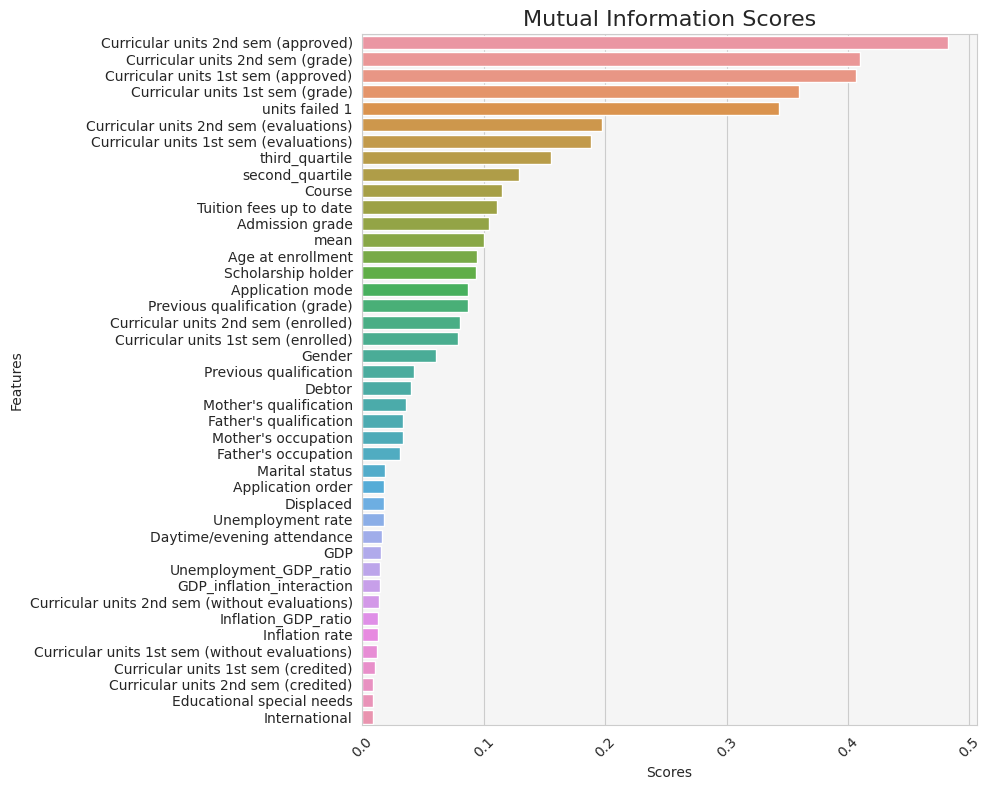

In [31]:
plt.figure(figsize=(10, 8))

# Create the barplot
sns.barplot(x='Scores', y='Features', data=mi_scores)

# Add a title
plt.title("Mutual Information Scores", fontsize=16)

# Rotate the y-axis labels (if needed)
plt.yticks(rotation=0)

# Rotate the x-axis labels (if needed)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap
plt.show()

#### Remove the Features with low dependency

In [32]:
x.drop(low_score_feature_names,axis = 1,inplace = True)
df_test.drop(low_score_feature_names,axis = 1,inplace = True)

### **4.5 Feature Scaling <a class="anchor"  id="4.6"></a>**
Standardize the value, to bring values in all features into similar range

In [33]:
scaler = StandardScaler()

In [34]:
#fit the scalar to train data and transform the train data
x_scaled = scaler.fit_transform(x)

**For test data, use the scalar calculated from train data**

In [35]:
df_test_scaled = scaler.transform(df_test)

### **4.7 Feature Reduction with PCA <a class="anchor"  id="4.7"></a>**
Principle Component Axis
#### Visualize how much variance in the data is explained by the principal components cumulatively. This helps in determining the optimal number of components needed to retain most of the variance (information) from the original data.

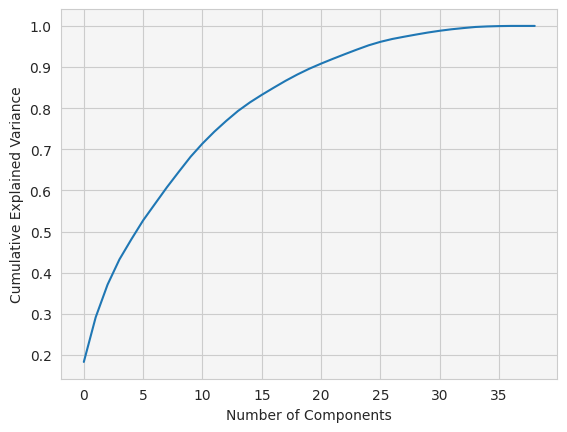

In [36]:
pca = PCA()
pca.fit(x_scaled)  # X_train is your training data
#Percentage of variance explained by each of the selected components.
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

#### As seen in the plot above, variance stopped increasing after No.feature = 35

#### Which means we can reduce feature to 35 and still retain the most of information in dataset

In [37]:
## PCA- Transformation
pca=PCA(n_components=35)
pca

PCA(n_components=35)

In [38]:
#Scaled Data
x_scaled=pca.fit_transform(x_scaled)

In [39]:
#Note: we use PCA scaled for train data on test data
df_test_scaled = pca.transform(df_test_scaled)

### **4.8 Dividing in train-test-split <a class="anchor"  id="4.8"></a>**

**Split the Data into training and testing for unscaled**

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Split the Data into training and testing for scaled**

In [41]:
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

## Step 5 Baseline Model Comparison <a class="anchor"  id="step5"></a>
#### In this Section the following baseline model are trained and compared
#### * Logistic Regression
#### * Naive Bayes
#### * KNN
#### * Gradient Boost
#### * XGBoost
#### * Decision Tree
#### * Random Forest

### A general model training function 
1. Import model (can be any)
2. Use **Straitified K Fold** to balance of percentage each class in train & test and shuffle data, specify random state to make sure all model can get same input
3. Train Model with train data
4. Predict Model with test data
5. Calculate Accurarcy score, Precision Score, Recall Score and F1 Score for each Fold **only for 'Graduate' Class**. Because for our model, the importance of class 'Graduate' (encode 2) is much more than the other classes

    Do not use weighted Precision & Recall and F1 which average score to counts class imbalance, because class 'Graduate' is more important
6. Print the average of scores over all Fold
7. Print the Classification Report
8. Plot the Confusion matrix
9. Save **Accurarcy** and F1 for this model (f1 is used because both Precision and Recall are useful but Accuracy is used for final model marking)

In [42]:
Training_Accuracy = []
Testing_Accuracy = []
Training_F1 = []
Testing_F1 = []

#For scaled data
def model_prediction(model, x, y, n_splits, random_state):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    training_score = []
    testing_score = []
    precission = []
    recall = []
    training_f1_score_ = []
    testing_f1_score_ = []

    x = pd.DataFrame(x)  # Convert x to DataFrame
    
    #Loop over K fold
    for train_index, test_index in skf.split(x, y):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(x_train, y_train)
        x_train_pred = model.predict(x_train)
        x_test_pred = model.predict(x_test)

        a = accuracy_score(y_train, x_train_pred) * 100
        b = accuracy_score(y_test, x_test_pred) * 100
#         c = precision_score(y_test, x_test_pred, average='weighted') 
#         d = recall_score(y_test, x_test_pred, average='weighted')     
#         e = f1_score(y_test, x_test_pred, average='weighted')
        c = precision_score(y_test, x_test_pred, average = None) * 100
        d = recall_score(y_test, x_test_pred, average = None) * 100 
        e = f1_score(y_train, x_train_pred, average = None) * 100
        f = f1_score(y_test, x_test_pred, average = None) * 100
        #we only look at score for Graduate Class
        c = c[-1]
        d = d[-1]
        e = e[-1]
        f = f[-1]

        training_score.append(a)
        testing_score.append(b)
        precission.append(c)
        recall.append(d)
        training_f1_score_.append(e)
        testing_f1_score_.append(f)
    
    print("\n------------------------------------------------------------------------")
    print(f"Mean Accuracy_Score of {model} model on Training Data is:", np.mean(training_score))
    print(f"Mean Accuracy_Score of {model} model on Testing Data is:", np.mean(testing_score))
    print(f"Mean Precision Score of {model} model is:", np.mean(precission))
    print(f"Mean Recall Score of {model} model is:", np.mean(recall))
    print(f"Mean f1 Score of {model} model on Training Data is:", np.mean(training_f1_score_))
    print(f"Mean f1 Score of {model} model on Testing Data is:", np.mean(testing_f1_score_))
    
    # Classification report and confusion matrix
    print("\n------------------------------------------------------------------------")
    print(f"Classification Report of {model} model is:")
    print(classification_report(y_test, x_test_pred))
    
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test, x_test_pred)
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm, annot=True, fmt="g", cmap="summer")
    plt.show()
    
    Training_Accuracy.append(np.mean(training_score))
    Testing_Accuracy.append(np.mean(testing_score))
    Training_F1.append(np.mean(training_f1_score_))
    Testing_F1.append(np.mean(testing_f1_score_))

### 5.1 Logistic Regression <a class="anchor"  id="5.1"></a>
Logistic Regression is designed for binary classification, but can be used for multi-classed problem by:
multiple binary classification models for each class vs. all other classes (called one-vs-rest) or one model for each pair of classes (called one-vs-one).
* One-vs-Rest: Fit one binary classification model for each class vs. all other classes.
* One-vs-One: Fit one binary classification model for each pair of classes.

In [43]:
LogisticRegression_model = LogisticRegression()


------------------------------------------------------------------------
Mean Accuracy_Score of LogisticRegression() model on Training Data is: 81.67784049840257
Mean Accuracy_Score of LogisticRegression() model on Testing Data is: 81.6356933556038
Mean Precision Score of LogisticRegression() model is: 83.64506745438243
Mean Recall Score of LogisticRegression() model is: 92.39567993431882
Mean f1 Score of LogisticRegression() model on Training Data is: 87.82921401665764
Mean f1 Score of LogisticRegression() model on Testing Data is: 87.80265717502502

------------------------------------------------------------------------
Classification Report of LogisticRegression() model is:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85      5059
           1       0.62      0.57      0.59      2988
           2       0.83      0.92      0.88      7256

    accuracy                           0.82     15303
   macro avg       0.79      0.77      0

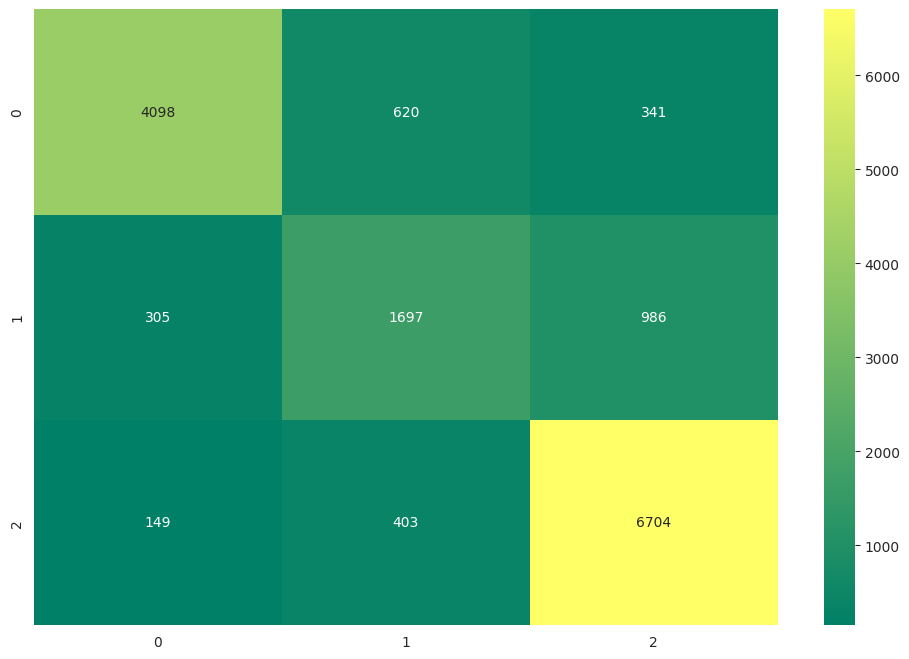

In [44]:
model_prediction(LogisticRegression_model, x_scaled, y, n_splits=5, random_state=42)

### 5.2 Naive Bayes <a class="anchor"  id="5.2"></a>

In [45]:
NB_model = GaussianNB()


------------------------------------------------------------------------
Mean Accuracy_Score of GaussianNB() model on Training Data is: 74.02898626839138
Mean Accuracy_Score of GaussianNB() model on Testing Data is: 74.00089613402235
Mean Precision Score of GaussianNB() model is: 77.55668882828013
Mean Recall Score of GaussianNB() model is: 85.1028273807489
Mean f1 Score of GaussianNB() model on Training Data is: 81.17330449877029
Mean f1 Score of GaussianNB() model on Testing Data is: 81.15373632951416

------------------------------------------------------------------------
Classification Report of GaussianNB() model is:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      5059
           1       0.54      0.39      0.45      2988
           2       0.78      0.86      0.81      7256

    accuracy                           0.74     15303
   macro avg       0.70      0.68      0.68     15303
weighted avg       0.73      0.74      0.7

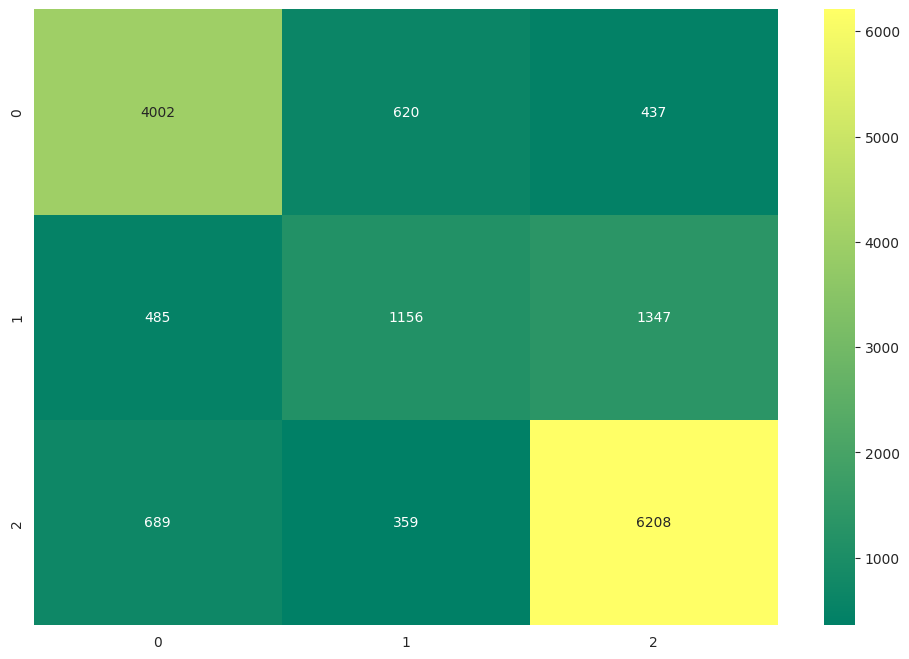

In [46]:
model_prediction(NB_model, x_scaled, y, n_splits=5, random_state=42)

### 5.3 K Nearest Neighbor <a class="anchor"  id="5.3"></a>

In [47]:
KNN_Model = KNeighborsClassifier()


------------------------------------------------------------------------
Mean Accuracy_Score of KNeighborsClassifier() model on Training Data is: 83.98579408978189
Mean Accuracy_Score of KNeighborsClassifier() model on Testing Data is: 77.89017312903499
Mean Precision Score of KNeighborsClassifier() model is: 81.93871230879252
Mean Recall Score of KNeighborsClassifier() model is: 88.16494366006953
Mean f1 Score of KNeighborsClassifier() model on Training Data is: 88.9884421137544
Mean f1 Score of KNeighborsClassifier() model on Testing Data is: 84.93753919301518

------------------------------------------------------------------------
Classification Report of KNeighborsClassifier() model is:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      5059
           1       0.54      0.49      0.52      2988
           2       0.82      0.88      0.85      7256

    accuracy                           0.78     15303
   macro avg       0.73   

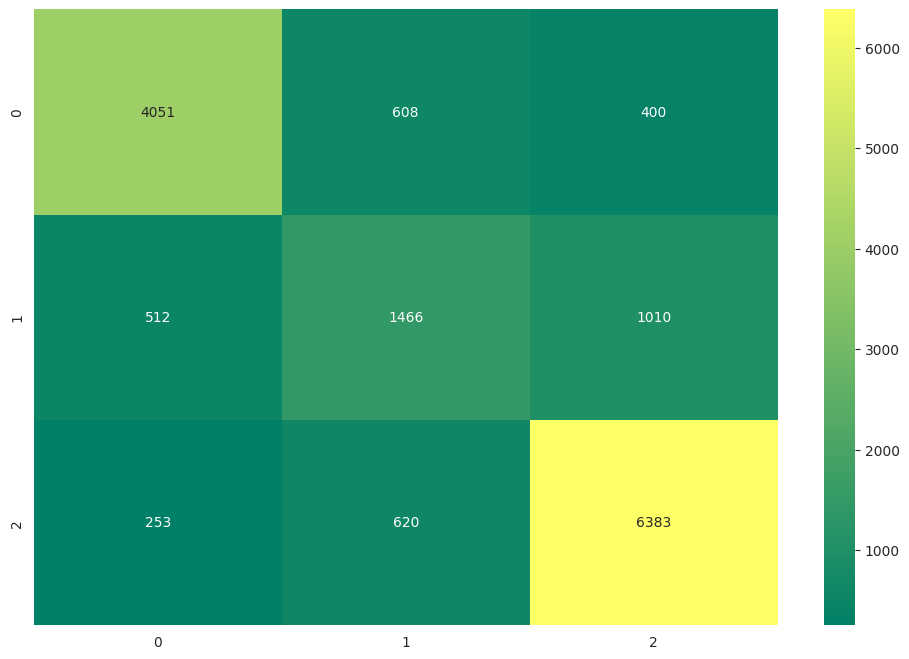

In [48]:
model_prediction(KNN_Model, x_scaled, y, n_splits=5, random_state=42)

### 5.4 Gradient Boost <a class="anchor"  id="5.4"></a>

In [49]:
GB_model = GradientBoostingClassifier()


------------------------------------------------------------------------
Mean Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 83.10920301848384
Mean Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 82.75830497858573
Mean Precision Score of GradientBoostingClassifier() model is: 85.07432119499161
Mean Recall Score of GradientBoostingClassifier() model is: 92.08699344996178
Mean f1 Score of GradientBoostingClassifier() model on Training Data is: 88.63664643491055
Mean f1 Score of GradientBoostingClassifier() model on Testing Data is: 88.44161641607634

------------------------------------------------------------------------
Classification Report of GradientBoostingClassifier() model is:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      5059
           1       0.64      0.61      0.63      2988
           2       0.85      0.92      0.88      7256

    accuracy                         

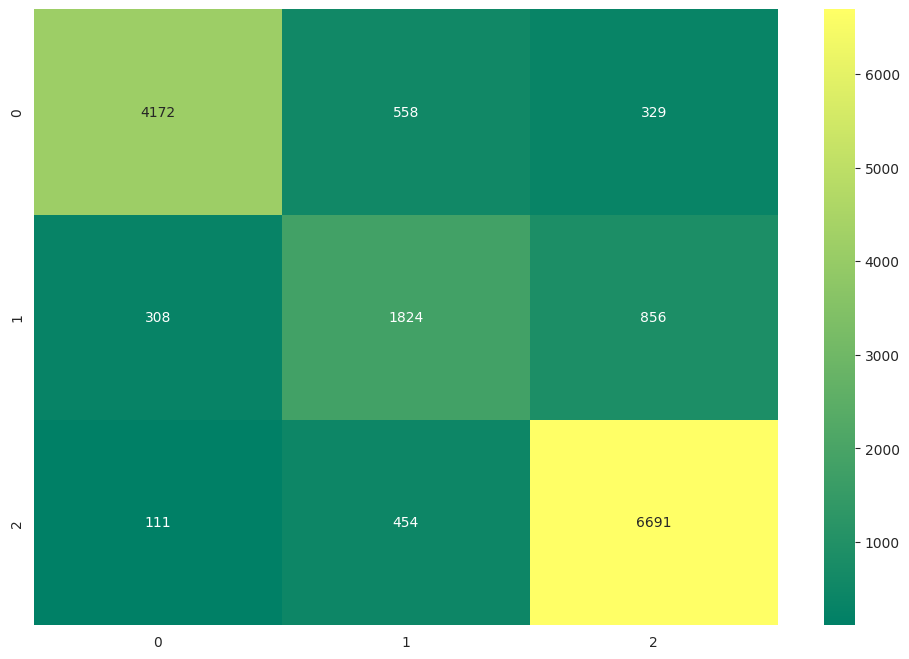

In [50]:
model_prediction(GB_model, x, y, n_splits=5, random_state=42)

### 5.5 XG Boost <a class="anchor"  id="5.5"></a>

In [51]:
XGBClassifier_model = XGBClassifier()


------------------------------------------------------------------------
Mean Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...) model on Training Data is: 88.58177177828928
Mean Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
       

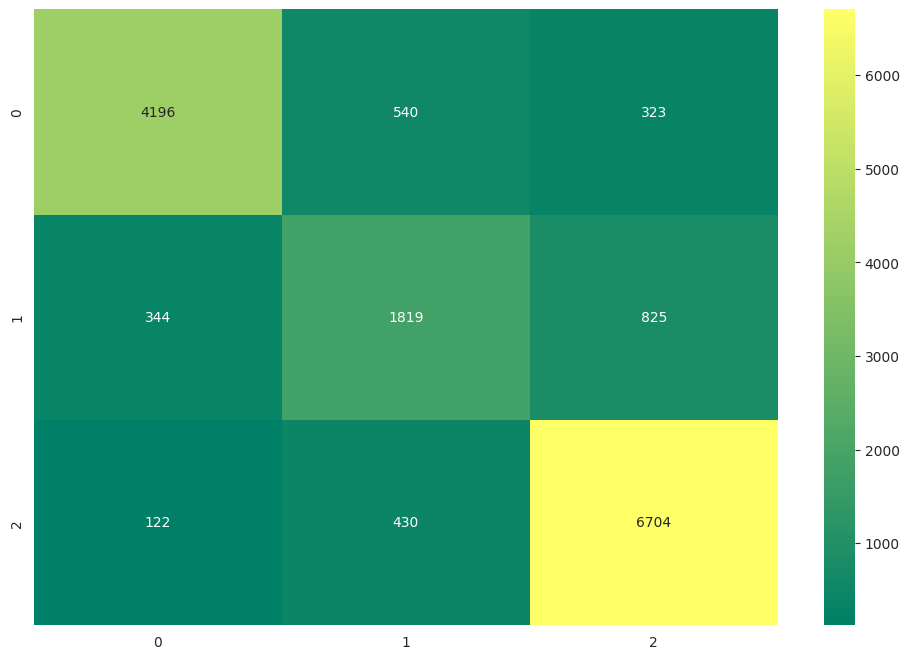

In [52]:
model_prediction(XGBClassifier_model, x, y, n_splits=5, random_state=42)

### 5.6 Decision Tree <a class="anchor"  id="5.6"></a>

In [53]:
DecisionTreeClassifier_model = DecisionTreeClassifier()


------------------------------------------------------------------------
Mean Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 100.0
Mean Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 74.04794052285324
Mean Precision Score of DecisionTreeClassifier() model is: 82.49941903493543
Mean Recall Score of DecisionTreeClassifier() model is: 81.04846303587959
Mean f1 Score of DecisionTreeClassifier() model on Training Data is: 100.0
Mean f1 Score of DecisionTreeClassifier() model on Testing Data is: 81.76730075680722

------------------------------------------------------------------------
Classification Report of DecisionTreeClassifier() model is:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      5059
           1       0.47      0.49      0.48      2988
           2       0.82      0.81      0.82      7256

    accuracy                           0.74     15303
   macro avg       0.70      0.70  

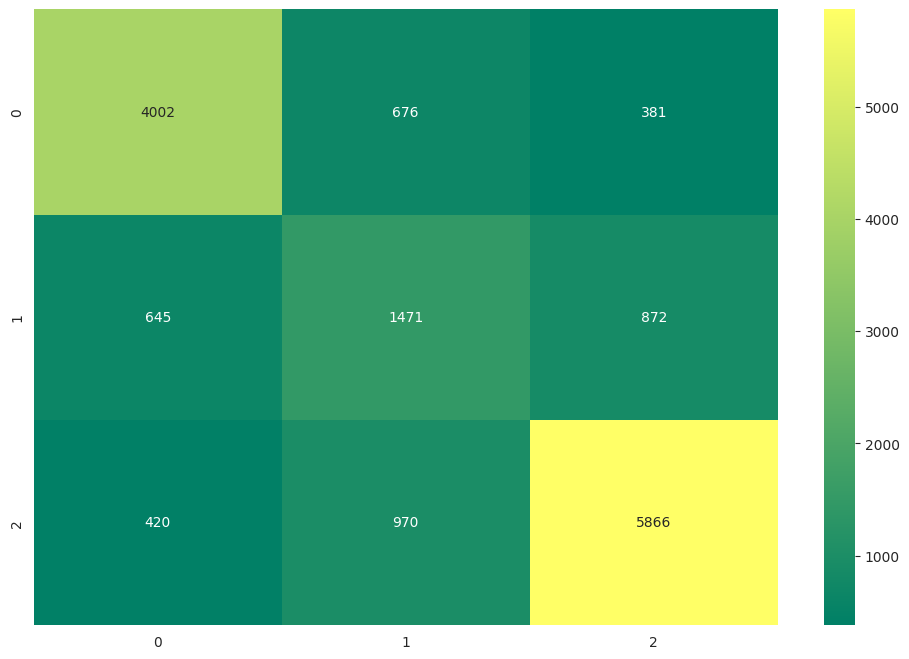

In [54]:
model_prediction(DecisionTreeClassifier_model, x, y, n_splits=5, random_state=42)

### 5.7 Random Forest <a class="anchor"  id="5.7"></a>

In [55]:
RF_model = RandomForestClassifier()


------------------------------------------------------------------------
Mean Accuracy_Score of RandomForestClassifier() model on Training Data is: 99.99771296283316
Mean Accuracy_Score of RandomForestClassifier() model on Testing Data is: 82.49430846952546
Mean Precision Score of RandomForestClassifier() model is: 84.7768524371359
Mean Recall Score of RandomForestClassifier() model is: 92.27715961124254
Mean f1 Score of RandomForestClassifier() model on Training Data is: 99.99896642607362
Mean f1 Score of RandomForestClassifier() model on Testing Data is: 88.36804902023898

------------------------------------------------------------------------
Classification Report of RandomForestClassifier() model is:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      5059
           1       0.63      0.60      0.62      2988
           2       0.85      0.92      0.88      7256

    accuracy                           0.82     15303
   macro avg

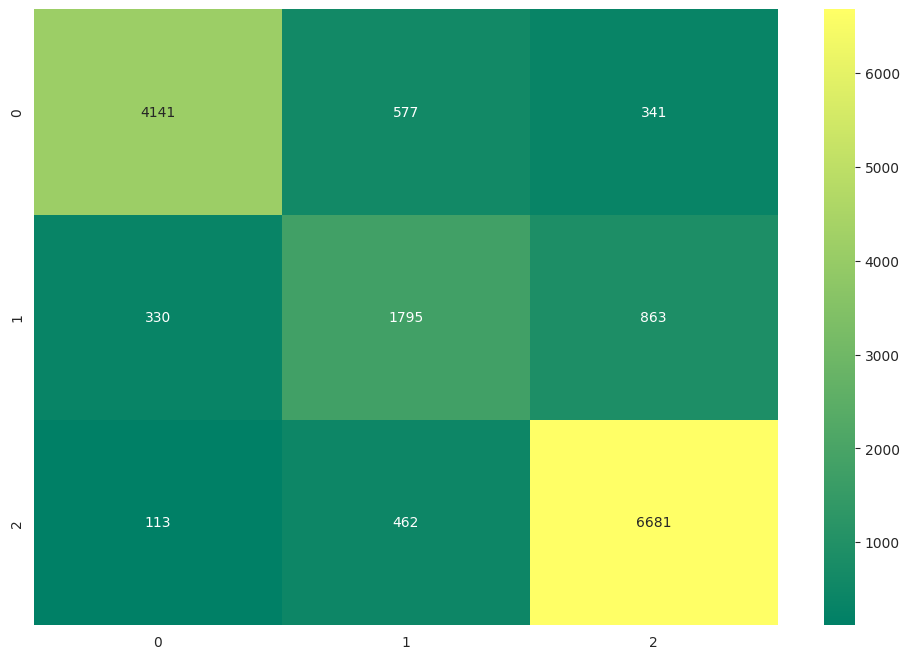

In [56]:
model_prediction(RF_model, x, y, n_splits=5, random_state=42)

### 5.8 LightGBM <a class="anchor"  id="5.8"></a>

In [57]:
LGBM_model =  LGBMClassifier()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1991
[LightGBM] [Info] Number of data points in the train set: 61214, number of used features: 39
[LightGBM] [Info] Start training from score -1.106863
[LightGBM] [Info] Start training from score -1.633477
[LightGBM] [Info] Start training from score -0.746218
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2000
[LightGBM] [Info] Number of data points in the train set: 61214, 

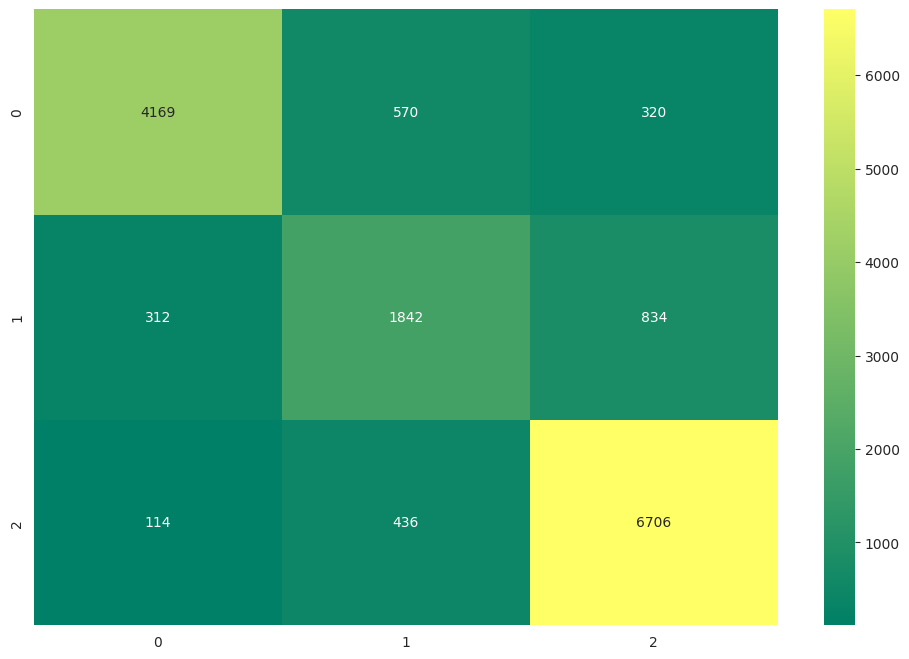

In [58]:
model_prediction(LGBM_model, x, y, n_splits=5, random_state=42)

### 5.9 Model Comparision <a class="anchor"  id="5.9"></a>
**The following models are more sensitive to scaling data, therefore they are trained on scaled data:**
* Logistic Regression
* KNN
* Naive Bayes

**The rest of the models are not that sensitve to scaling data, therefore they are trained on unscaled data.**

In [59]:
# Create a DataFrame with these accuracy scores
data = {
    'Model': ['Logistic_Regression_Scaled', 'KNN_Scaled','Naive_Bayes_Scaled','GBoost','XGBoost','DecisionTree','RandomForest','LGBM'],
    'Training_Accuracy': Training_Accuracy,
    'Testing_Accuracy': Testing_Accuracy,
    'Training_F1': Training_F1,
    'Testing_F1': Testing_F1
}
Acc_df = pd.DataFrame(data)

In [60]:
# Sort by Testing_Accuracy
Acc_df = Acc_df.sort_values(by='Testing_Accuracy', ascending=False).reset_index(drop=True)

Acc_df

,Model,Training_Accuracy,Testing_Accuracy,Training_F1,Testing_F1
0,LGBM,85.201521,83.096785,89.913789,88.657341
1,XGBoost,88.581772,83.001385,91.976707,88.578078
2,GBoost,83.109203,82.758305,88.636646,88.441616
3,RandomForest,99.997713,82.494308,99.998966,88.368049
4,Logistic_Regression_Scaled,81.677840,81.635693,87.829214,87.802657
5,Naive_Bayes_Scaled,83.985794,77.890173,88.988442,84.937539
6,DecisionTree,100.000000,74.047941,100.000000,81.767301
7,KNN_Scaled,74.028986,74.000896,81.173304,81.153736


#### Based on the Table above, LGBM and XGBoost are the two models with best performance (high accurarcy and high f1 score), there for LGBM and XGBoost are chosed for hypertuning.

### Step 6 Hyperparametertuning <a class="anchor"  id="step6"></a>
The optimization process consists of 4 parts which are as follows-

**1. Initialize domain space**

The domain space is the input values over which we want to search.

**2. Define objective function**

The objective function can be any function which returns a real value that we want to minimize. In this case, we want to minimize the validation error of a machine learning model with respect to the hyperparameters. If the real value is accuracy, then we want to maximize it. Then the function should return the negative of that metric.

**3. Optimization algorithm**

It is the method used to construct the surrogate objective function and choose the next values to evaluate.

**4. Results**

Results are score or value pairs that the algorithm uses to build the model.

#### Library Hyperot is used

fmin - the main function for us, it will minimize our functional

tpe and anneal - optimization approaches

hp - include different distributions of variables

Trials - is used for logging

### 6.1 XGBoost <a class="anchor"  id="6.1"></a>
Bayesian Optimization with HYPEROPT:

https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning#2.-XGBoost-hyperparameters-

#### 6.1.1 Initialise domain space for range of hyperparemeters values <a class="anchor"  id="6.1.1"></a>
The available hyperopt optimization algorithms are -

**hp.choice**(label, options) — Returns one of the options, which should be a list or tuple.

**hp.randint**(label, upper) — Returns a random integer between the range [0, upper).

**hp.uniform**(label, low, high) — Returns a value uniformly between low and high.

**hp.quniform**(label, low, high, q) — Returns a value round(uniform(low, high) / q) * q, i.e it rounds the decimal values and returns an integer.

**hp.normal**(label, mean, std) — Returns a real value that’s normally-distributed with mean and standard deviation sigma.

In [61]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9), #Gamma specifies the minimum loss reduction required to make a split.
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),#L1 regularization term on weights
        'reg_lambda' : hp.uniform('reg_lambda', 0,1), #L2 regularization term on weights 
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),#the subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),#the minimum sum of weights of all observations required in a child.
        'n_estimators': 180,
        'seed': 0
    }

#### 6.1.2 Define Objective funtion <a class="anchor"  id="6.1.2"></a>
Here **best_hyperparams** gives us the optimal parameters that best fit model and better loss function value.

**trials** is an object that contains or stores all the relevant information such as hyperparameter, loss-functions for each set of parameters that the model has been trained.

**‘fmin’** is an optimization function that minimizes the loss function and takes in 4 inputs - fn, space, algo and max_evals.

Algorithm used is **tpe.suggest.**

In [62]:
def objective(space):
    #Use L1 regularization
    clf=XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    # Cross-validation strategy
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Perform cross-validation
    cv_results = cross_validate(clf, x, y, cv=cv, scoring='accuracy', n_jobs=-1, return_estimator=True)
    
    #average the test accurarcy
    mean_accurarcy = np.mean(cv_results['test_score'])

    print ("SCORE:", mean_accurarcy)
    return {'loss': -mean_accurarcy, 'status': STATUS_OK }

#### 6.1.3 Optimising <a class="anchor"  id="6.1.3"></a>

In [63]:
#NOTE: the following code commented because the best params tunes is acquired after the first run, no need to run again to waste time
#trials = Trials()

# best_hyperparams = fmin(fn = objective,
#                         space = space,
#                         algo = tpe.suggest,
#                         max_evals = 100,
#                         trials = trials)

#### Note: the following cell is added after hypertuning is finished to record the best parameters tuned. 
#### This is because the above hypertuning cell are commented to aviod uncessensary rerun which is a waste of CPU & time

In [64]:
best_hyperparams = {'colsample_bytree': 0.7143174135799728, 'gamma': 1.1605519458844356, 
                    'max_depth': 14.0, 'min_child_weight': 6.0, 'reg_alpha': 44.0, 'reg_lambda': 0.19898949314533854}

In [65]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.7143174135799728, 'gamma': 1.1605519458844356, 'max_depth': 14.0, 'min_child_weight': 6.0, 'reg_alpha': 44.0, 'reg_lambda': 0.19898949314533854}


In [66]:
best_hyperparams['max_depth'] = int(best_hyperparams['max_depth'])
best_hyperparams['min_child_weight'] = int(best_hyperparams['min_child_weight'])

In [67]:
hypertuned_XGBoost_model = XGBClassifier(**best_hyperparams)



------------------------------------------------------------------------
Mean Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7143174135799728, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1.1605519458844356,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=14, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...) model on Training Data is: 83.35326348407213
Mean Accuracy_Score of XGBClassifier(base_score=None, 

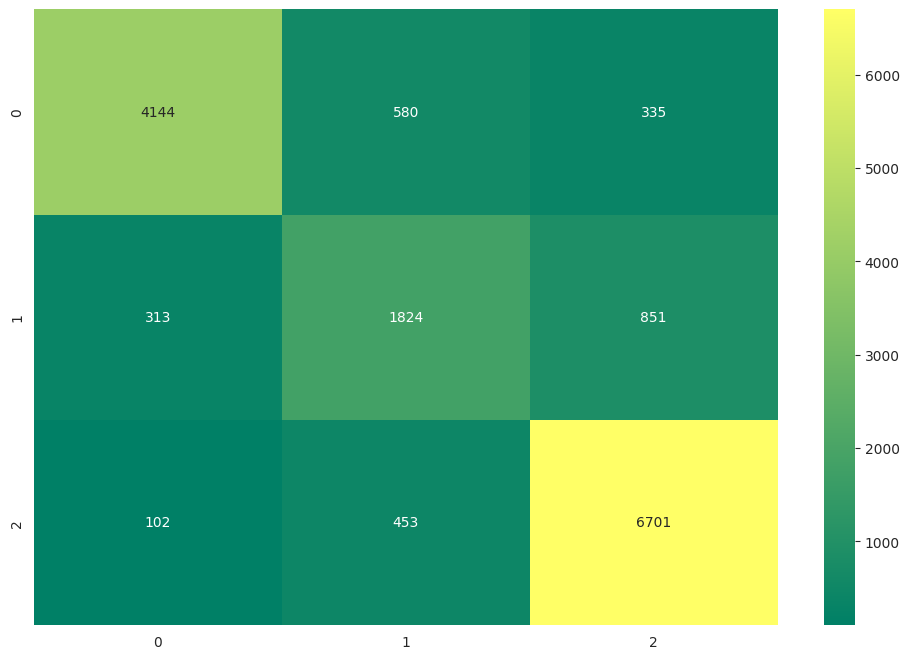

In [68]:
model_prediction(hypertuned_XGBoost_model, x, y, n_splits=5, random_state=42)

### 6.2 Light GB <a class="anchor"  id="6.2"></a>

In [69]:
space_lgbm = {
    'num_leaves': hp.quniform('num_leaves', 30, 150, 1),
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'feature_fraction': hp.uniform('feature_fraction', 0.5, 1),
    'bagging_fraction': hp.uniform('bagging_fraction', 0.5, 1), 
    'lambda_l1': hp.choice('lambda_l1', [0, hp.loguniform('lambda_l1_positive', -16, 2)]),
    'lambda_l2': hp.choice('lambda_l2', [0, hp.loguniform('lambda_l2_positive', -16, 2)]),
    'verbose': -1
    }


In [70]:
def objective_lgbm(space):
    clf= LGBMClassifier(
                    num_leaves = int(space['num_leaves']), 
                    learning_rate = space['learning_rate'], 
                    feature_fraction = space['feature_fraction'],
                    bagging_fraction = space['bagging_fraction'],
                    lambda_l1=space['lambda_l1'],
                    lambda_l2=space['lambda_l2'],
                    verbose = space['verbose']
    )
    
    # Cross-validation strategy
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Perform cross-validation
    cv_results = cross_validate(clf, x, y, cv=cv, scoring='accuracy', n_jobs=-1, return_estimator=True)
    
    #average the test accurarcy
    mean_accurarcy = np.mean(cv_results['test_score'])

    print ("SCORE:", mean_accurarcy)
    return {'loss': -mean_accurarcy, 'status': STATUS_OK }

In [71]:
# Note: the following code is commented to save time from retune the params because the best params is known from first run
# trials = Trials()

# best_hyperparams_lgbm = fmin(fn = objective_lgbm,
#                         space = space_lgbm,
#                         algo = tpe.suggest,
#                         max_evals = 100,
#                         trials = trials)

#### Note: the following cell is added after hypertuning is finished to record the best parameters tuned. 
#### This is because the above hypertuning cell are commented to aviod uncessensary rerun which is a waste of CPU & time

In [72]:
best_hyperparams_lgbm = {'bagging_fraction': 0.5016542893006835, 'feature_fraction': 0.7131728290290188, 
                         'lambda_l1': 1, 'lambda_l1_positive': 4.5629744374945895, 'lambda_l2': 1,
                         'lambda_l2_positive': 1.2018572273807567e-07, 'learning_rate': 0.09580125456694187, 'num_leaves': 70.0, 'verbose': -1}

In [73]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams_lgbm)

The best hyperparameters are :  

{'bagging_fraction': 0.5016542893006835, 'feature_fraction': 0.7131728290290188, 'lambda_l1': 1, 'lambda_l1_positive': 4.5629744374945895, 'lambda_l2': 1, 'lambda_l2_positive': 1.2018572273807567e-07, 'learning_rate': 0.09580125456694187, 'num_leaves': 70.0, 'verbose': -1}


In [74]:
best_hyperparams_lgbm['num_leaves'] = int(best_hyperparams_lgbm['num_leaves'] )

In [75]:
hypertuned_LGB_model = LGBMClassifier(**best_hyperparams_lgbm)


------------------------------------------------------------------------
Mean Accuracy_Score of LGBMClassifier(bagging_fraction=0.5016542893006835,
               feature_fraction=0.7131728290290188, lambda_l1=1,
               lambda_l1_positive=4.5629744374945895, lambda_l2=1,
               lambda_l2_positive=1.2018572273807567e-07,
               learning_rate=0.09580125456694187, num_leaves=70, verbose=-1) model on Training Data is: 87.31572934748678
Mean Accuracy_Score of LGBMClassifier(bagging_fraction=0.5016542893006835,
               feature_fraction=0.7131728290290188, lambda_l1=1,
               lambda_l1_positive=4.5629744374945895, lambda_l2=1,
               lambda_l2_positive=1.2018572273807567e-07,
               learning_rate=0.09580125456694187, num_leaves=70, verbose=-1) model on Testing Data is: 83.17911870749285
Mean Precision Score of LGBMClassifier(bagging_fraction=0.5016542893006835,
               feature_fraction=0.7131728290290188, lambda_l1=1,
            

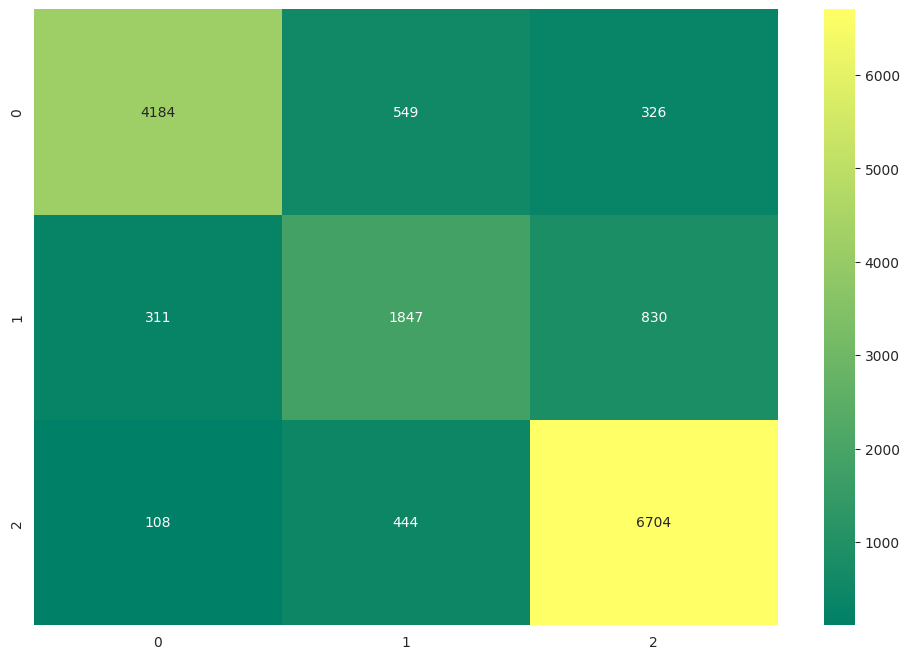

In [76]:
model_prediction(hypertuned_LGB_model, x, y, n_splits=5, random_state=42)

### 6.3 Model Comparison <a class="anchor"  id="6.3"></a>

In [77]:
# Create a DataFrame with these accuracy scores
data = {
    'Model': ['Logistic_Regression_Scaled', 'KNN_Scaled','Naive_Bayes_Scaled','GBoost','XGBoost','DecisionTree','RandomForest','LGBM','Hypertuned XGBoost', 'Hypertuned LGBM'],
    'Training_Accuracy': Training_Accuracy,
    'Testing_Accuracy': Testing_Accuracy,
    'Training_F1': Training_F1,
    'Testing_F1': Testing_F1
}
Acc_df = pd.DataFrame(data)

In [78]:
# Sort by Testing_Accuracy
Acc_df = Acc_df.sort_values(by='Testing_Accuracy', ascending=False).reset_index(drop=True)

Acc_df

,Model,Training_Accuracy,Testing_Accuracy,Training_F1,Testing_F1
0,Hypertuned LGBM,87.315729,83.179119,91.179849,88.732557
1,LGBM,85.201521,83.096785,89.913789,88.657341
2,XGBoost,88.581772,83.001385,91.976707,88.578078
3,Hypertuned XGBoost,83.353263,82.773984,88.834546,88.493092
4,GBoost,83.109203,82.758305,88.636646,88.441616
5,RandomForest,99.997713,82.494308,99.998966,88.368049
6,Logistic_Regression_Scaled,81.677840,81.635693,87.829214,87.802657
7,Naive_Bayes_Scaled,83.985794,77.890173,88.988442,84.937539
8,DecisionTree,100.000000,74.047941,100.000000,81.767301
9,KNN_Scaled,74.028986,74.000896,81.173304,81.153736


## Hypertune LGBM has the highest testing accuracy value: 83.2, therefore hypertuned LGBM is selected as the final model 🎉🎉🎉

### Step 7 Submission Preparation <a class="anchor"  id="step7"></a>
**REMEMBER to reverse Encoding of Output before submit it!**

In [79]:
y_pred = hypertuned_LGB_model.predict(df_test)
y_pred = label_encoder.inverse_transform(y_pred)

In [80]:
submission = pd.DataFrame({"id": id_test, "Target": y_pred})
submission.to_csv("submission.csv", index=False)

In [81]:
submission

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Enrolled
...,...,...
51007,127525,Dropout
51008,127526,Dropout
51009,127527,Dropout
51010,127528,Dropout
